# Setup

In [ ]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from pathlib import Path
import IPython.display as ipd
from IPython.display import Image

In [ ]:
gtzan_dir = Path(str(os.environ.get('GTZAN_DIR')))   #C:/VisualStudioRepositories/MUSIC_DATA/gt/Data
fma_dir = Path(str(os.environ.get('FMA_DIR')))       #C:/VisualStudioRepositories/MUSIC_DATA/fma

gtzan_audio_dir = gtzan_dir / 'genres_original'
gtzan_image_dir = gtzan_dir / 'spectrograms'

fma_small_audio_dir = fma_dir / 'fma_small'
fma_small_image_dir = fma_dir / 'spectrograms/fma_small'

fma_medium_audio_dir = fma_dir / 'fma_medium'
fma_medium_image_dir = fma_dir / 'spectrograms/fma_medium'

In [ ]:
IMAGE_SIZE = 128    #128x128 px images for the CNN (with 3 channels)

# GTZAN spectrograms

Example of a spectrogram included with the Kaggle GTZAN dataset

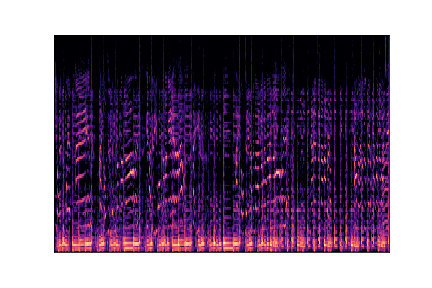

In [ ]:
# size: 432 x 288
# uses amplitude_to_db instead of power_to_db
Image(filename = gtzan_dir / 'images_original/rock/rock00040.png')

Create own spectrogram

In [ ]:
FRAME_SIZE = 2048
HOP_SIZE = 512
N_MELS = 128

In [ ]:
x_amp, sr_amp = librosa.load(gtzan_dir / 'genres_original/rock/rock.00040.wav', sr=None, mono=True)
ipd.Audio(x_amp, rate=sr_amp)

In [ ]:
spectrogram_mel = librosa.feature.melspectrogram(y=x_amp, sr=sr_amp, n_fft=FRAME_SIZE, hop_length=HOP_SIZE, n_mels=N_MELS)
spectrogram_mel.shape # (n_mels, frames)

spectrogram_mel_log = librosa.power_to_db(spectrogram_mel, ref=np.max)
spectrogram_mel_log.shape # (n_mels, frames)

(128, 1293)

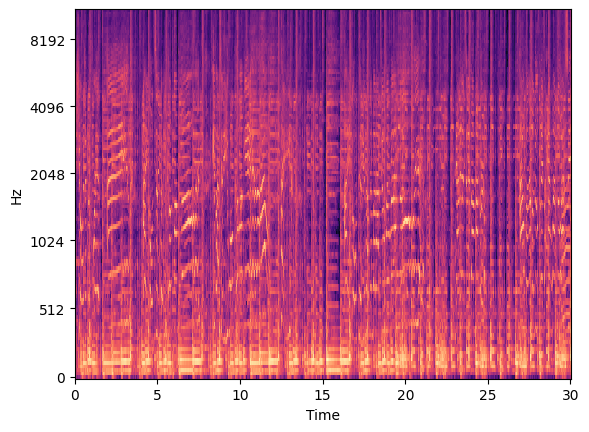

In [ ]:
fig1, ax1 = plt.subplots()
librosa.display.specshow(spectrogram_mel_log, sr=sr_amp, x_axis='time', y_axis='mel', ax=ax1)
plt.show()

Create an example of final result (128 x 128 mel spectrogram) prepared for the CNN

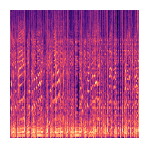

In [ ]:
DPI = 100
PX = 1/DPI
BORDER_SIZE = 30.5 #px
SIZE_PX = IMAGE_SIZE + BORDER_SIZE #128px + 30.5px white border which won't be included in the final img

fig2, ax2 = plt.subplots(figsize=(SIZE_PX*PX, SIZE_PX*PX), dpi=DPI)
ax2.axis('off')
fig2.tight_layout()
librosa.display.specshow(spectrogram_mel_log, sr=sr_amp, x_axis='time', y_axis='mel', ax=ax2, auto_aspect=True)
plt.show()

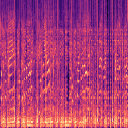

In [ ]:
# Result is 128x128 px
fig2.savefig(fname="../output/images/sample_gtzan.png", bbox_inches='tight', pad_inches=0, dpi=DPI)
Image(filename="../output/images/sample_gtzan.png")

# 128x128 Mel spectrogram file creation

Create spectrograms saved in the following output file structure:

---output_base_path

----------parent_folder1

--------------------spectrogram1

--------------------spectrogram2

--------------------...

----------parent_folder2

--------------------spectrogram1

--------------------...

----------...

Output parent folders are named after parent folders from the input filepaths.

Files do not have to be divided into parent folders by class (e.g. GTZAN is divided by class, but FMA is divided by IDs).

In [ ]:
def calculate_mel_spectrogram(x_amp, sr_amp, n_fft=2048, hop_length=512, n_mels=128):
    spectrogram_mel = librosa.feature.melspectrogram(y=x_amp, sr=sr_amp, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)
    spectrogram_mel_log = librosa.power_to_db(spectrogram_mel, ref=np.max)
    return spectrogram_mel_log

def create_mel_spectrogram_plt(spectrogram_mel_log, sr_amp, image_size=128):
    DPI = 100
    PX = 1/DPI
    BORDER_SIZE = 30.5 #px
    SIZE_PX = image_size + BORDER_SIZE #128 + 30.5 white border which won't be included in the final img

    fig, ax = plt.subplots(figsize=(SIZE_PX*PX, SIZE_PX*PX), dpi=DPI)
    ax.axis('off')
    fig.tight_layout()
    librosa.display.specshow(spectrogram_mel_log, sr=sr_amp, x_axis='time', y_axis='mel', ax=ax, auto_aspect=True)
    return fig

def create_and_save_mel_spectrogram(x_amp, sr_amp, output_base_path, parent_folder, filename, image_size=128):
    # skip already existing files
    # for example fma-small is a subset of fma-medium
    # so some spectrograms might have been created earlier
    if os.path.exists(output_base_path / parent_folder / filename):
        return
    
    spectrogram_mel_log = calculate_mel_spectrogram(x_amp, sr_amp)
    fig = create_mel_spectrogram_plt(spectrogram_mel_log, sr_amp, image_size)
    
    # create parent folder if it doesn't exist
    if not os.path.exists(output_base_path / parent_folder):
        os.makedirs(output_base_path / parent_folder)
    
    fig.savefig(fname= output_base_path / parent_folder / filename, bbox_inches='tight', pad_inches=0, dpi=100)
    plt.close(fig)

In [ ]:
def create_spectrograms_for_files(filepaths, output_base_path):
    for audio_filepath in filepaths:
        try:
            x_amp, sr_amp = librosa.load(audio_filepath, sr=None, mono=True)
            
            parent_folder = Path(audio_filepath.parent.name)
            filename = Path(audio_filepath.stem + '.png')
            
            create_and_save_mel_spectrogram(x_amp, sr_amp, output_base_path, parent_folder, filename)
        except: #in case of faulty audio files
            print(f'ERROR: {audio_filepath} could not be processed')
            continue

# GTZAN spectrogram creation

Faulty files:

> jazz.00054 - can't be loaded

> reggae.00086 - very distorted

Faulty files have been removed from working audio directory.

In [ ]:
gtzan_audio_filepaths = list(gtzan_audio_dir.rglob('*.wav'))

In [ ]:
# GTZAN INPUT:
# C:/VisualStudioRepositories/MUSIC_DATA/gt/Data/genres_original/    Blues/blues.00000.wav (parent + filename)

# GTZAN OUTPUT:
# C:/VisualStudioRepositories/MUSIC_DATA/gt/Data/spectrograms/       Blues/blues.00000.png (parent + filename)

create_spectrograms_for_files(gtzan_audio_filepaths, gtzan_image_dir)

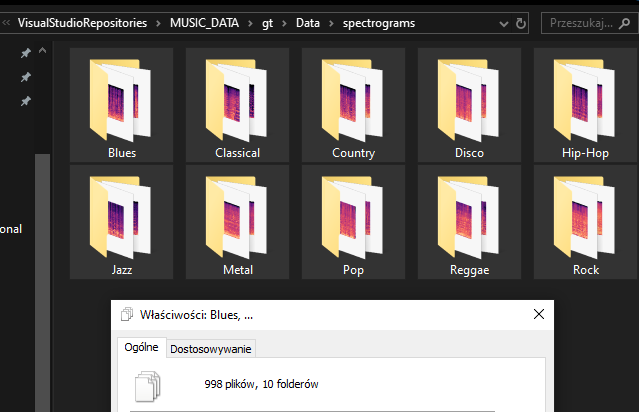

In [ ]:
Image(filename='../output/images/gtzan_spectr.png')

# FMA-small spectrogram creation

Faulty files:
> 99134 can't be loaded at all

> 108925 can't be loaded at all

> 133297 can't be loaded at all

> 98565 lasts only 1.6s

> 98567 lasts only 0.5s

> 98569 lasts only 1.5s

Faulty files have been removed from working audio directory and moved to FAULTY_FILES/fma_small.

In [ ]:
fma_audio_filepaths = list(fma_small_audio_dir.rglob('*.mp3'))

In [ ]:
# FMA-SMALL INPUT:
# C:/VisualStudioRepositories/MUSIC_DATA/fma/fma_small/                  000/000002.mp3 (parent + filename)

# FMA-SMALL OUTPUT:
# C:/VisualStudioRepositories/MUSIC_DATA/fma/spectrograms/fma_small/     000/000002.png (parent + filename)

create_spectrograms_for_files(fma_audio_filepaths, fma_small_image_dir)

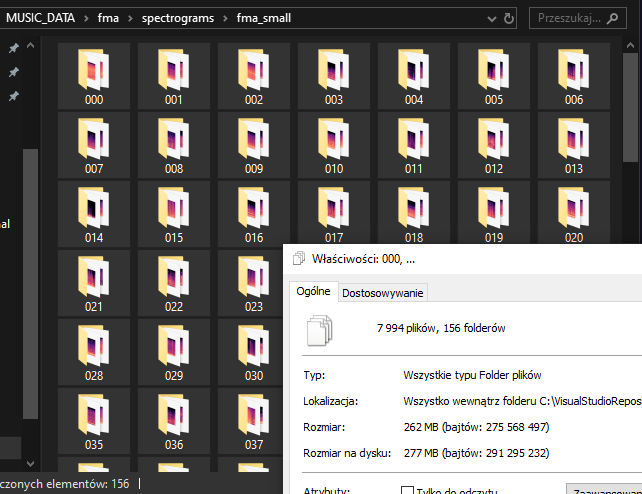

In [ ]:
Image(filename='../output/images/fma_spectr.png')

# FMA-medium spectrogram creation

21 faulty files specified in FMA Github page.

https://github.com/mdeff/fma/wiki

In [ ]:
# move faulty files to a separate folder (FAULTY_AUDIO/fma_medium)
faulty_fma_medium_files = ['fma_medium/001/001486.mp3',
                           'fma_medium/005/005574.mp3',
                           'fma_medium/065/065753.mp3',
                           'fma_medium/080/080391.mp3',
                           'fma_medium/098/098558.mp3',
                           'fma_medium/098/098559.mp3',
                           'fma_medium/098/098560.mp3',
                           'fma_medium/098/098565.mp3',
                           'fma_medium/098/098566.mp3',
                           'fma_medium/098/098567.mp3',
                           'fma_medium/098/098568.mp3',
                           'fma_medium/098/098569.mp3',
                           'fma_medium/098/098571.mp3',
                           'fma_medium/099/099134.mp3',
                           'fma_medium/105/105247.mp3',
                           'fma_medium/108/108924.mp3',
                           'fma_medium/108/108925.mp3',
                           'fma_medium/126/126981.mp3',
                           'fma_medium/127/127336.mp3',
                           'fma_medium/133/133297.mp3',
                           'fma_medium/143/143992.mp3']

print(len(faulty_fma_medium_files))

fma_medium_faulty_dir = fma_dir / 'FAULTY_AUDIO' / 'fma_medium'
[os.rename(Path(fma_dir / file), Path(fma_medium_faulty_dir / Path(file).name)) for file in faulty_fma_medium_files]

21

In [ ]:
fma_medium_audio_filepaths = list(fma_medium_audio_dir.rglob('*.mp3'))
len(fma_medium_audio_filepaths)

24979

In [ ]:
# FMA-MEDIUM INPUT:
# C:/VisualStudioRepositories/MUSIC_DATA/fma/fma_medium/                  000/000002.mp3 (parent + filename)

# FMA-MEDIUM OUTPUT:
# C:/VisualStudioRepositories/MUSIC_DATA/fma/spectrograms/fma_medium/     000/000002.png (parent + filename)

create_spectrograms_for_files(fma_medium_audio_filepaths, fma_medium_image_dir)

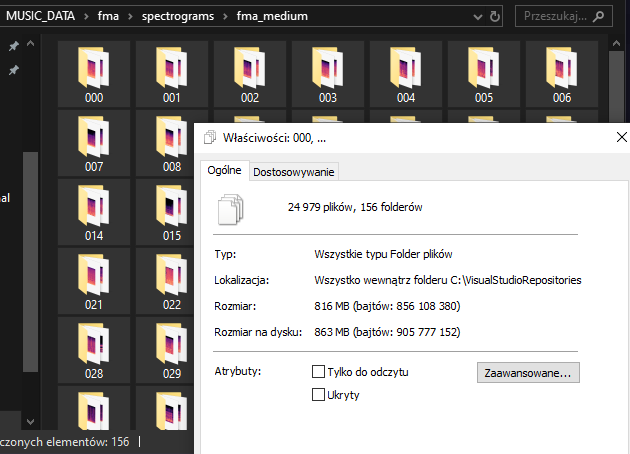

In [ ]:
Image(filename='../output/images/fma_m_spectr.png')